# Machine-learning analysis - Balanced dataset - Only TNBC - Hugo and Variant type - p-value < 0.05

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [3]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [4]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_p005 = pd.read_csv('Occurrence_Matrix_onlyTNrelgenes_pval005_withLabels_VARIANTCLASS_afterMutCLust_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.set_index(occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_p005

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()
columns_with_all_zeros

0

In [6]:
(occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [7]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_p005[['Target']]
patient_target

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_006,0
brca_smc_2018_BB01_008,0
...,...
MBCProject_xBfJfri9,0
MBCProject_xoHAF6s8,0
MBCProject_yZSnSluK,0
MBCProject_ygcMFgCR,0


In [8]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_p005.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust


There aren't patients with zero mutations.

In [55]:
# load the patients you want to keep in the test set 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyhugo_onlyTN_test_pts_p005 = pd.read_csv('Test_onlyTN_onlyHugo_p005.txt', sep=',', engine='python')
onlyhugo_onlyTN_test_pts_p005

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR105
...,...
139,MBCProject_pktAIxFb
140,brca_smc_2018_BB01_005
141,brca_smc_2018_BB01_009
142,MBCProject_xoHAF6s8


In [56]:
onlyhugo_onlyTN_test_pts_p005_list = onlyhugo_onlyTN_test_pts_p005['Patient'].to_list()
onlyhugo_onlyTN_test_pts_p005_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [10]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_p005['Target'].value_counts()

In [11]:
class_count_0

1116

In [12]:
class_count_1

288

In [13]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (1116, 1453)
Target 1 - TN: (288, 1453)


In [14]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_006
3,brca_smc_2018_BB01_008
4,brca_smc_2018_BB01_009
...,...
1111,MBCProject_xBfJfri9
1112,MBCProject_xoHAF6s8
1113,MBCProject_yZSnSluK
1114,MBCProject_ygcMFgCR


In [15]:
# Triple-Negative patients 
class_1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


##  Guided Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [59]:
# load the training patients from onlyhugo(p<0.05) dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
onlyhugo_onlyTN_training_pts_p005 = pd.read_csv('Training_onlyTN_onlyhugo_p005.txt', sep=',', engine='python')
onlyhugo_onlyTN_training_pts_p005

,Patient
0,TCGA-WT-AB41
1,brca_smc_2018_BB01_131
2,TCGA-D8-A1JF
3,TCGA-EW-A6S9
4,TCGA-C8-A130
...,...
427,MBCProject_QJFdf8hQ
428,MBCProject_lQtMtjFR
429,MBCProject_pMcWcrtZ
430,MBCProject_rJHBiKTl


In [60]:
onlyhugo_onlyTN_training_pts_p005_list = onlyhugo_onlyTN_training_pts_p005['Patient'].to_list()
onlyhugo_onlyTN_training_pts_p005_list

['TCGA-WT-AB41',
 'brca_smc_2018_BB01_131',
 'TCGA-D8-A1JF',
 'TCGA-EW-A6S9',
 'TCGA-C8-A130',
 'TCGA-AO-A0JD',
 'TCGA-C8-A26W',
 'brca_smc_2018_BB01_028',
 'TCGA-AN-A0FY',
 'PD4939a',
 'brca_smc_2018_BR414',
 'MBCProject_70CxiQFk',
 'X11BR043',
 'X05BR038',
 'MBC_151',
 'MBC_74',
 'TCGA-BH-A0DD',
 'MBC_75',
 'TCGA-A2-A04V',
 'MBCProject_bvHXCoTY',
 'TCGA-A2-A04X',
 'MBCProject_zyt5TKFB',
 'MBC_7',
 'MBC_209',
 'PD4070a',
 'PD3985a',
 'MBCProject_9RtxtGUO',
 'MBC_90',
 'TCGA-A7-A56D',
 'X15BR003',
 'MBCProject_LDCbC8t9',
 'TCGA-E9-A1R7',
 'BR-V-064',
 'MBC_130',
 'PD4111a',
 'TCGA-E2-A14O',
 'TCGA-BH-A0HB',
 'BR-M-123',
 'X11BR015',
 'TCGA-A2-A259',
 'MBCProject_LPHKFauY',
 'MBC_13',
 'MBC_139',
 'brca_smc_2018_BR064',
 'MBC_180',
 'MBCProject_lGCMIGT0',
 'TCGA-A8-A09C',
 'TCGA-BH-A202',
 'TCGA-A8-A07Z',
 'X11BR032',
 'BR-M-165',
 'TCGA-D8-A1XA',
 'PD4132a',
 'TCGA-E9-A1RA',
 'X09BR004',
 'MBCProject_mMhdcrh5',
 'TCGA-BH-A0HN',
 'BR-M-041',
 'brca_smc_2018_BR442',
 'BR-M-048',
 'MBCPro

In [61]:
occurrence_matrix_TNandNONTN_relgenes_p005

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
occurrence_matrix_TNandNONTN_relgenes_p005_2 = occurrence_matrix_TNandNONTN_relgenes_p005.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
occurrence_matrix_TNandNONTN_relgenes_p005_2=occurrence_matrix_TNandNONTN_relgenes_p005_2.rename(columns={'index': 'Patient'}, inplace=False)
occurrence_matrix_TNandNONTN_relgenes_p005_2

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1401,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1402,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# create the training set 
occurrence_matrix_TNandNONTN_relgenes_p005_2_training = pd.merge(onlyhugo_onlyTN_training_pts_p005, occurrence_matrix_TNandNONTN_relgenes_p005_2, how='inner', on=['Patient'])
occurrence_matrix_TNandNONTN_relgenes_p005_2_training

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
0,TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-C8-A130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
428,MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
429,MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
430,MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [64]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTN_relgenes_p005_2_training['Target'].value_counts())

total class of 1 and 0: 0    216
1    216
Name: Target, dtype: int64


In [65]:
# create the test set 
occurrence_matrix_TNandNONTN_relgenes_p005_2_test = pd.merge(onlyhugo_onlyTN_test_pts_p005, occurrence_matrix_TNandNONTN_relgenes_p005_2, how='inner', on=['Patient'])
occurrence_matrix_TNandNONTN_relgenes_p005_2_test

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
0,brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
140,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [66]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTN_relgenes_p005_2_test['Target'].value_counts())

total class of 1 and 0: 1    72
0    72
Name: Target, dtype: int64


In [67]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = pd.concat([occurrence_matrix_TNandNONTN_relgenes_p005_2_training, occurrence_matrix_TNandNONTN_relgenes_p005_2_test], axis=0)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
0,TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-C8-A130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
140,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [68]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.set_index('Patient', inplace=True)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.name=None
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


total class of 1 and 0: 0    288
1    288
Name: Target, dtype: int64


<AxesSubplot:title={'center':'Count (target) - Balanced dataset - Total TN and non TN genes'}>

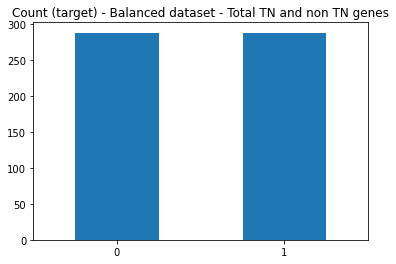

In [69]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [70]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.sum(axis=0)

TP53_Missense_Mutation_270_282         43
MAML3_In_Frame_Ins_503_503              3
PIK3CA_Missense_Mutation_1046_1047     66
TP53_Missense_Mutation_173_177         26
TP53_Missense_Mutation_236_258         39
                                     ... 
ACTG1_5'UTR_noClust                     0
TACC3_Intron_noClust                    1
CPEB1_Intron_noClust                    1
EPAS1_Intron_noClust                    1
Target                                288
Length: 1453, dtype: int64

In [71]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [72]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all()
columns_with_all_zero

TP53_Missense_Mutation_270_282        False
MAML3_In_Frame_Ins_503_503            False
PIK3CA_Missense_Mutation_1046_1047    False
TP53_Missense_Mutation_173_177        False
TP53_Missense_Mutation_236_258        False
                                      ...  
ACTG1_5'UTR_noClust                    True
TACC3_Intron_noClust                  False
CPEB1_Intron_noClust                  False
EPAS1_Intron_noClust                  False
Target                                False
Length: 1453, dtype: bool

In [73]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all().sum()

353

There are 353 columns containing all zero values.

In [74]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.eq(0).all()]
columns_to_drop

Index(['PIK3CA_Silent_1046_1047', 'TP53_Frame_Shift_Del_173_177',
       'TP53_Nonsense_Mutation_270_282', 'TP53_Silent_236_258',
       'PIK3CA_Nonsense_Mutation_418_420', 'STAT1_Missense_Mutation_noClust',
       'SELL_Splice_Site_noClust', 'CRABP1_Missense_Mutation_noClust',
       'STRN4_Missense_Mutation_noClust', 'ATG14_Missense_Mutation_noClust',
       ...
       'SPP1_In_Frame_Ins_noClust', 'SLAMF9_Frame_Shift_Ins_noClust',
       'ASH2L_Frame_Shift_Ins_noClust', 'UBE3B_Frame_Shift_Ins_noClust',
       'WDR62_Splice_Region_noClust', 'C11orf85_Splice_Region_noClust',
       'AIG1_Intron_noClust', 'DDX42_Splice_Region_noClust',
       'ETFB_Intron_noClust', 'ACTG1_5'UTR_noClust'],
      dtype='object', length=353)

In [75]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [25]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_BALANCED_VARIANTCLASS_afterMutClust.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

### Manually split the data in training set and test set 

In [76]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [77]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X 

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [78]:
train_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(onlyhugo_onlyTN_training_pts_p005_list)]
train_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [79]:
y_train = train_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target']
y_train

TCGA-WT-AB41              0
brca_smc_2018_BB01_131    0
TCGA-D8-A1JF              0
TCGA-EW-A6S9              0
TCGA-C8-A130              0
                         ..
MBCProject_QJFdf8hQ       1
MBCProject_lQtMtjFR       1
MBCProject_pMcWcrtZ       1
MBCProject_rJHBiKTl       1
MBCProject_wzCxuoio       1
Name: Target, Length: 432, dtype: int64

In [80]:
X_train = train_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(onlyhugo_onlyTN_test_pts_p005_list)]
test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [82]:
test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.to_list()

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [83]:
len(test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.to_list())

144

In [84]:
y_test = test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target']
y_test

brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_119    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
brca_smc_2018_BR105       1
                         ..
MBCProject_pktAIxFb       0
brca_smc_2018_BB01_005    0
brca_smc_2018_BB01_009    0
MBCProject_xoHAF6s8       0
MBCProject_ygcMFgCR       0
Name: Target, Length: 144, dtype: int64

In [85]:
X_test = test_occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [86]:
# sum each column
X.sum(axis=0)

TP53_Missense_Mutation_270_282        43
MAML3_In_Frame_Ins_503_503             3
PIK3CA_Missense_Mutation_1046_1047    66
TP53_Missense_Mutation_173_177        26
TP53_Missense_Mutation_236_258        39
                                      ..
SRPK1_Intron_noClust                   2
KAT8_Splice_Region_noClust             1
TACC3_Intron_noClust                   1
CPEB1_Intron_noClust                   1
EPAS1_Intron_noClust                   1
Length: 1099, dtype: int64

In [87]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target']
y

TCGA-WT-AB41              0
brca_smc_2018_BB01_131    0
TCGA-D8-A1JF              0
TCGA-EW-A6S9              0
TCGA-C8-A130              0
                         ..
MBCProject_pktAIxFb       0
brca_smc_2018_BB01_005    0
brca_smc_2018_BB01_009    0
MBCProject_xoHAF6s8       0
MBCProject_ygcMFgCR       0
Name: Target, Length: 576, dtype: int64

In [88]:
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['PIK3CA_In_Frame_Del_418_420', 'CDC20_Splice_Site_noClust',
       'KRTAP24-1_Missense_Mutation_noClust', 'LARP4B_Splice_Site_noClust',
       'SMTNL1_Nonsense_Mutation_noClust', 'MTRF1_Missense_Mutation_noClust',
       'CTCF_Missense_Mutation_noClust', 'ARID1A_Frame_Shift_Ins_noClust',
       'TNRC6A_Splice_Site_noClust', 'GP2_Missense_Mutation_noClust',
       ...
       'FAM166B_Silent_noClust', 'SMTNL1_Silent_noClust',
       'OSR2_Silent_noClust', 'ZMIZ1_Frame_Shift_Ins_noClust',
       'TMEM214_Splice_Site_noClust', 'CCNT2_Splice_Site_noClust',
       'IP6K3_Splice_Region_noClust', 'SRPK1_Intron_noClust',
       'TACC3_Intron_noClust', 'CPEB1_Intron_noClust'],
      dtype='object', length=178)

In [90]:
len(X_train.columns[(X_train == 0).all(axis=0)])

178

There are 178 columns in the training dataset with just 0 values. 

In [91]:
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [92]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['PIK3CA_Missense_Mutation_418_420', 'CTCF_Missense_Mutation_283_288',
       'TP53_Frame_Shift_Del_191_199', 'TP53_In_Frame_Del_191_199',
       'TP53_Silent_270_282', 'TP53_Nonsense_Mutation_236_258',
       'TP53_In_Frame_Del_173_177', 'TP53_Frame_Shift_Del_270_282',
       'TP53_Nonsense_Mutation_173_177', 'MTMR12_Silent_520_521',
       ...
       'ACAN_Intron_noClust', 'DNAH10_In_Frame_Del_noClust',
       'AIG1_Silent_noClust', 'CCRL2_Splice_Region_noClust',
       'KNG1_Silent_noClust', 'UBE3B_Splice_Region_noClust',
       'ZNF311_Frame_Shift_Ins_noClust', 'SETDB1_3'UTR_noClust',
       'KAT8_Splice_Region_noClust', 'EPAS1_Intron_noClust'],
      dtype='object', length=639)

There are 639 columns in the test dataset with just zero values.

In [93]:
y_train.value_counts()

0    216
1    216
Name: Target, dtype: int64

In [94]:
y_test.value_counts()

1    72
0    72
Name: Target, dtype: int64

In [95]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [96]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
TCGA-WT-AB41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_131,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-D8-A1JF,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-EW-A6S9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
TCGA-C8-A130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,0.0


In [97]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

178

178 columns contain NaN values, that are the columns with all zero values in the training set.

In [98]:
np.isinf(normalized_X_train).any().any()

False

In [99]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
TCGA-WT-AB41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_131,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-D8-A1JF,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-EW-A6S9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [100]:
normalized_X_train.isna().any().any()

False

In [101]:
normalized_X_train.sum(axis=0)

TP53_Missense_Mutation_270_282        32.0
MAML3_In_Frame_Ins_503_503             2.0
PIK3CA_Missense_Mutation_1046_1047    41.0
TP53_Missense_Mutation_173_177        14.0
TP53_Missense_Mutation_236_258        13.5
                                      ... 
SRPK1_Intron_noClust                   0.0
KAT8_Splice_Region_noClust             1.0
TACC3_Intron_noClust                   0.0
CPEB1_Intron_noClust                   0.0
EPAS1_Intron_noClust                   1.0
Length: 1099, dtype: float64

In [102]:
normalized_X_train.sum(axis=0).sum()

2026.8333333333333

In [103]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [104]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BR105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,inf,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
MBCProject_xoHAF6s8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,inf,inf,0.0


In [105]:
np.isinf(normalized_X_test).any().any()

True

In [106]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [107]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

178

178 as the number of zero columns in the training set 

In [108]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BR105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
brca_smc_2018_BB01_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0
MBCProject_xoHAF6s8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0


In [109]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,KNG1_Silent_noClust,UBE3B_Splice_Region_noClust,ZNF311_Frame_Shift_Ins_noClust,IP6K3_Splice_Region_noClust,SETDB1_3'UTR_noClust,SRPK1_Intron_noClust,KAT8_Splice_Region_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPAS1_Intron_noClust
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_xoHAF6s8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
np.isinf(normalized_X_test).any().sum()

0

In [111]:
normalized_X_test.isnull().all(axis=0).sum()

0

## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.846769...
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246
Best cross-validation score:  0.6805132317562149


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

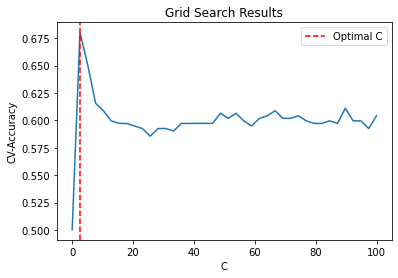

In [112]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000) # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246 (C=2.57).

In [113]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Liblinear failed to converge, increase the number of iterations.


Mean Cross-Validation Accuracy: 0.6828388131515638
Standard Deviation of Accuracy: 0.03333002129085126
Mean Cross-Validation Precision - 1: 0.7049271230388608
Standard Deviation of Precision - 1: 0.03661794630915661
Mean Cross-Validation Recall - 1: 0.6290697674418605
Standard Deviation of Recall - 1: 0.08610934223987732
Mean Cross-Validation F1-score - 1: 0.655263599449646
Standard Deviation of F1-score - 1: 0.049870331903435525


In [114]:
precision_scores_1 

array([0.67647059, 0.73333333, 0.65853659, 0.69767442, 0.75862069])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [115]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.6691425506870877
Standard Deviation of Precision - 0: 0.04250130949054556
Mean Cross-Validation Recall - 0: 0.7360465116279069
Standard Deviation of Recall - 0: 0.05644028418377489
Mean Cross-Validation F1-score: - 0 0.6973178927070925
Standard Deviation of F1-score: - 0 0.025658217622768997


In [116]:
precision_scores_0

array([0.62264151, 0.73809524, 0.64444444, 0.69767442, 0.64285714])

In [54]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=int(1e6), warm_start=True, intercept_scaling=10000.0, C=2.57)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        75
           1       0.79      0.77      0.78        74

    accuracy                           0.79       149
   macro avg       0.79      0.79      0.79       149
weighted avg       0.79      0.79      0.79       149

Numero di feature con coefficiente diverso da zero: 189
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_276', 'PIK3CA_Missense_Mutation_1046_1047',
       'TP53_Missense_Mutation_173_225', 'TP53_Missense_Mutation_236_258',
       'GATA3_Frame_Shift_Ins_308_335', 'PIK3CA_Missense_Mutation_545_546',
       'TP53_Nonsense_Mutation_173_225', 'PIK3CA_Missense_Mutation_541_542',
       'PIK3CA_Missense_Mutation_345_345', 'TP53_Frame_Shift_Del_173_225',
       ...
       'NOTCH2_Frame_Shift_Ins_noClust', 'GBGT1_Missense_Mutation_noClust',
       'CDH1_Splice_Region_noClust', 'FYB_Nonsense_Mutation_noClust',
       'CYP3A4_Splice_Reg

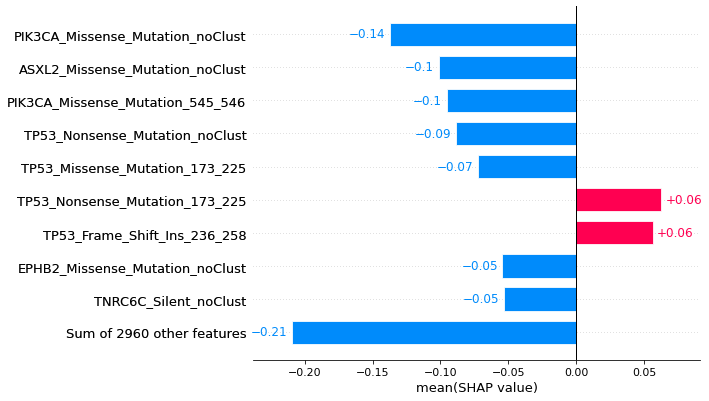

In [55]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

189 features have a coefficent different from zero.

### Study of the function Lasso

In [117]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=False, intercept_scaling=10000.0, C=2.57)   

In [118]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

Liblinear failed to converge, increase the number of iterations.


LogisticRegression(C=2.57, intercept_scaling=10000.0, max_iter=10000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [119]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [120]:
y_pred_simple_Lasso

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [121]:
y_test

brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_119    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
brca_smc_2018_BR105       1
                         ..
MBCProject_pktAIxFb       0
brca_smc_2018_BB01_005    0
brca_smc_2018_BB01_009    0
MBCProject_xoHAF6s8       0
MBCProject_ygcMFgCR       0
Name: Target, Length: 144, dtype: int64

In [122]:
print(classification_report(y_test, y_pred_simple_Lasso))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        72
           1       0.84      0.65      0.73        72

    accuracy                           0.76       144
   macro avg       0.78      0.76      0.76       144
weighted avg       0.78      0.76      0.76       144



In [123]:
coef_indexes_simple_Lasso = clf_simple_LogRegr.coef_[0].nonzero()[0]

# Numero delle feature con coefficiente diverso da zero
n_features_simple_Lasso = len(coef_indexes_simple_Lasso)

# Nomi delle feature con coefficiente diverso da zero
feature_names_simple_Lasso = X.columns[coef_indexes_simple_Lasso]


print(f"Numero di feature con coefficiente diverso da zero: {n_features_simple_Lasso}")
print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names_simple_Lasso}")


Numero di feature con coefficiente diverso da zero: 194
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'PIK3CA_Missense_Mutation_545_546',
       'TP53_Nonsense_Mutation_191_199', 'PIK3CA_Missense_Mutation_541_542',
       'PIK3CA_Missense_Mutation_345_345', 'AKT1_Missense_Mutation_17_17',
       ...
       'ATRX_3'UTR_noClust', 'SPP1_Intron_noClust',
       'MYL10_Splice_Region_noClust', 'RHPN1_Splice_Region_noClust',
       'P2RX2_Splice_Site_noClust', 'PIK3R1_Frame_Shift_Ins_noClust',
       'ACSM5_Splice_Region_noClust', 'SCAPER_Splice_Region_noClust',
       'NBL1_Nonsense_Mutation_noClust', 'ACAN_Intron_noClust'],
      dtype='object', length=194)


## Evaluate the model with classification metrics 

In [124]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.7638888888888888


In [125]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[63  9]
 [25 47]]


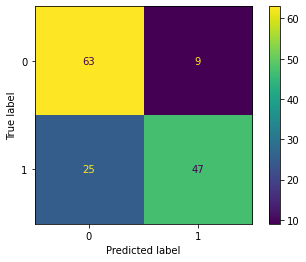

In [126]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [127]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [128]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.8392857142857143


In [129]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [130]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.6527777777777778


In [131]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [132]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.734375


In [133]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [134]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

47

In [135]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

63

In [136]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

9

In [137]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

25

In [138]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.5413127381832803


In [139]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_545_546',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'AKT1_Missense_Mutation_17_17',
 'TP53_Missense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_In_Frame_Del_173_177',
 'PIK3R1_In_Frame_Ins_566_578',
 'TP53_Frame_Shift_Ins_236_258',
 'MYL10_Splice_Region_26_26',
 'TP53_Nonsense_Mutation_noClust',
 'TP53_Missense_Mutation_noClust',
 'COL6A6_Missense_Mutation_noClust',
 'PIK3CA_Missense_Mutation_noClust',
 'PTEN_Frame_Shift_Ins_noClust',
 'TP53_Frame_Shift_Del_noClust',
 'MUC4_Missense_Mutation_noClust',
 'TP53_Splice_Site_noClust',
 'MYH7B_Missense_Mutation_noClust',
 'TNRC6C_Missense_Mutation_noClust',
 'ARHGAP5_Missense_Mutation_noCl

In [140]:
len(feature_names_lista_simple_Lasso)

194

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  0.01
Best cross-validation score:  0.7014969259556267


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

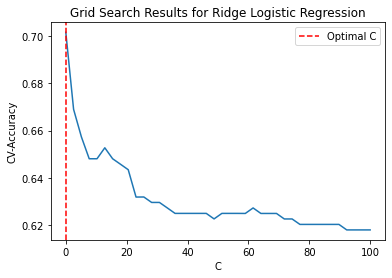

In [141]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 100 (C=0.01).

### Compute the classification metrics on the cross-validation results 

In [142]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.7014969259556267
Standard Deviation of Accuracy: 0.056594936353612214
Mean Cross-Validation Precision - 1: 0.6835854441067207
Standard Deviation of Precision - 1: 0.04746098536782245
Mean Cross-Validation Recall - 1: 0.7496828752642707
Standard Deviation of Recall - 1: 0.1138559754107852
Mean Cross-Validation F1-score - 1: 0.7115997196686668
Standard Deviation of F1-score - 1: 0.0687036033757695


In [143]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7343181602655288
Standard Deviation of Precision - 0: 0.085016892143924
Mean Cross-Validation Recall - 0: 0.6531712473572939
Standard Deviation of Recall - 0: 0.0679568374603871
Mean Cross-Validation F1-score: - 0 0.6868164771677807
Standard Deviation of F1-score: - 0 0.05051296531877762


## Ridge on the test set

In [144]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.67      0.83      0.75        72
           1       0.78      0.60      0.68        72

    accuracy                           0.72       144
   macro avg       0.73      0.72      0.71       144
weighted avg       0.73      0.72      0.71       144

Numero di feature con coefficiente diverso da zero: 921
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'PIK3CA_Missense_Mutation_545_546',
       'TP53_Nonsense_Mutation_191_199', 'PIK3CA_Missense_Mutation_541_542',
       'PIK3CA_Missense_Mutation_345_345', 'AKT1_Missense_Mutation_17_17',
       ...
       'ACAN_Intron_noClust', 'DNAH10_In_Frame_Del_noClust',
       'AIG1_Silent_noClust', 'CCRL2_Splice_Region_noClust',
       'KNG1_Silent_noClust', 'UBE3B_Splice_Region_n

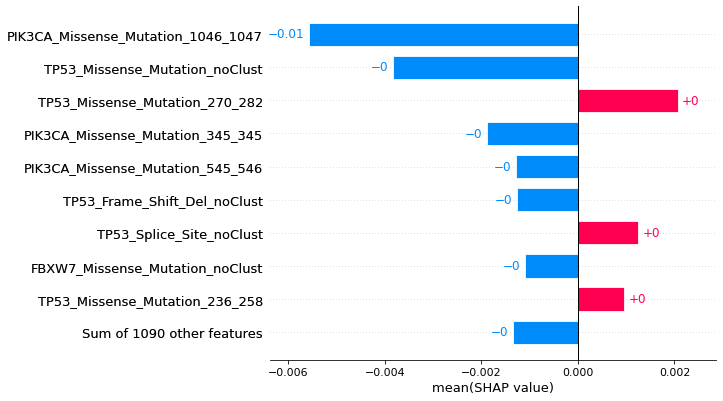

In [145]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [146]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

In [147]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=0.01, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [148]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [149]:
y_pred_simple_Ridge

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [150]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7152777777777778


In [151]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[60 12]
 [29 43]]


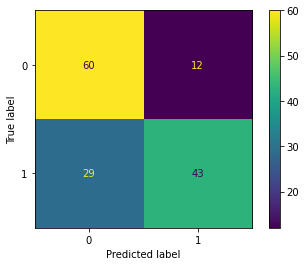

In [152]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [153]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.7818181818181819


In [154]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.5972222222222222


In [155]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.6771653543307087


In [156]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

43

In [157]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

60

In [158]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

12

In [159]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

29

In [160]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.443083263445202


# Full Logistic Regression

## Cross-validation

In [162]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.54022989 0.62068966 0.5        0.56976744 0.59302326]
Mean CV Accuracy: 0.5647420475808608


In [163]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.5647420475808608
Standard Deviation of Accuracy: 0.04182725178288179
Mean Cross-Validation Precision - 1: 0.5778610064715541
Standard Deviation of Precision - 1: 0.06514253520885306
Mean Cross-Validation Recall - 1: 0.5420718816067653
Standard Deviation of Recall - 1: 0.05925095663629044
Mean Cross-Validation F1-score - 1: 0.5541225157220286
Standard Deviation of F1-score - 1: 0.028128171629264134


In [164]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.5595777868641436
Standard Deviation of Precision - 0: 0.03252155059796874
Mean Cross-Validation Recall - 0: 0.5885835095137419
Standard Deviation of Recall - 0: 0.11779219226549634
Mean Cross-Validation F1-score: - 0 0.5698711572276265
Standard Deviation of F1-score: - 0 0.06677299785912415


## Full Logistic Regression on the test set 

In [165]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty='none') 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [166]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        72
           1       0.60      0.54      0.57        72

    accuracy                           0.59       144
   macro avg       0.59      0.59      0.59       144
weighted avg       0.59      0.59      0.59       144



### Study of the full logistic regression function

In [167]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty='none')

In [168]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [169]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [170]:
y_pred_full_logreg

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [171]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.5902777777777778


In [172]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[46 26]
 [33 39]]


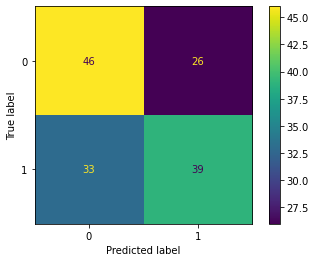

In [173]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

In [174]:
print("Precision ", precision(cm_full_logreg))

Precision  0.6


In [175]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.5416666666666666


In [176]:
print("F1:", f1(cm_full_logreg))

F1: 0.5693430656934306


In [177]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

39

In [178]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

46

In [179]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

26

In [180]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

33

In [181]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.18141497293515574


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 2.5738461538461537
Best cv accuracy: 0.6551456829724673


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

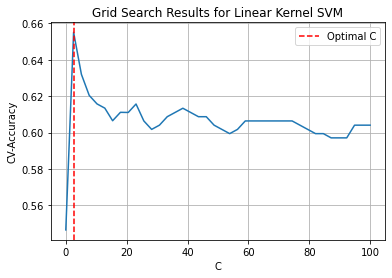

In [182]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 2.57

### Compute the classification metrics on the cross-validation results

In [183]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.6551456829724673
Standard Deviation of Accuracy: 0.04067983020770963
Mean Cross-Validation Precision - 1: 0.7218756733462616
Standard Deviation of Precision - 1: 0.03619789356057062
Mean Cross-Validation Recall - 1: 0.5046511627906977
Standard Deviation of Recall - 1: 0.11335867541352504
Mean Cross-Validation F1-score - 1: 0.5870988095713082
Standard Deviation of F1-score - 1: 0.08111075699292168


In [184]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.6242218346108507
Standard Deviation of Precision - 0: 0.04583884755365574
Mean Cross-Validation Recall - 0: 0.8051797040169133
Standard Deviation of Recall - 0: 0.046491923560190836
Mean Cross-Validation F1-score: - 0 0.7008351362255814
Standard Deviation of F1-score: - 0 0.021343952261058778


# Linear SVM on the test set 

In [185]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=2.57)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [186]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        72
           1       0.75      0.54      0.63        72

    accuracy                           0.68       144
   macro avg       0.70      0.68      0.67       144
weighted avg       0.70      0.68      0.67       144



### Study of the Linear SVM function

In [187]:
clf_linear_svm = SVC(kernel='linear', C=2.57)

In [188]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=2.57, kernel='linear')

In [189]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [190]:
y_pred_linear_svm

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [191]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.6805555555555556


In [192]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[59 13]
 [33 39]]


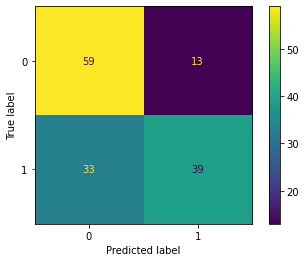

In [193]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [194]:
print("Precision ", precision(cm_linear_svm))

Precision  0.75


In [195]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.5416666666666666


In [196]:
print("F1:", f1(cm_linear_svm))

F1: 0.6290322580645162


In [197]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

39

In [198]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

59

In [199]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

13

In [200]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

33

In [201]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.3759047057780561


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [242]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 0.001
Best degree: 3
Best coef0: 10.0
Best cv accuracy: 0.7153702218658113


### Compute the classification metrics on the cross-validation results

In [203]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.7153702218658113
Standard Deviation of Accuracy: 0.05542831447276535
Mean Cross-Validation Precision - 1: 0.7501353336399864
Standard Deviation of Precision - 1: 0.056503119686385946
Mean Cross-Validation Recall - 1: 0.6521141649048625
Standard Deviation of Recall - 1: 0.14578558254053126
Mean Cross-Validation F1-score - 1: 0.687430922950199
Standard Deviation of F1-score - 1: 0.09003687735269014


In [204]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.7032317007823384
Standard Deviation of Precision - 0: 0.07437983557776492
Mean Cross-Validation Recall - 0: 0.7778012684989429
Standard Deviation of Recall - 0: 0.072846404222429
Mean Cross-Validation F1-score: - 0 0.7332850244048307
Standard Deviation of F1-score: - 0 0.03785712160699212


## Polynomial SVM on the test set 

In [205]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=0.001, degree=3, coef0=10)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [206]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        72
           1       0.81      0.60      0.69        72

    accuracy                           0.73       144
   macro avg       0.75      0.73      0.72       144
weighted avg       0.75      0.73      0.72       144



### Study of the Polynomial SVM function

In [243]:
clf_poly_svm = SVC(kernel='poly', C=0.001, degree=3, coef0=10)

In [244]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=0.001, coef0=10, kernel='poly')

In [245]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [246]:
y_pred_poly_svm

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [247]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.7291666666666666


In [248]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[62 10]
 [29 43]]


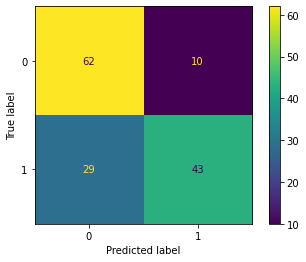

In [249]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [250]:
print("Precision ", precision(cm_poly_svm))

Precision  0.8113207547169812


In [251]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.5972222222222222


In [252]:
print("F1:", f1(cm_poly_svm))

F1: 0.688


In [253]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

43

In [254]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

62

In [255]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

10

In [256]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

29

In [257]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.47517688795824087


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [222]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 50.000499999999995
Best gamma: 0.001
Best cv accuracy: 0.7130179096498261


### Compute the classification metrics on the cross-validation results

In [223]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.7130179096498261
Standard Deviation of Accuracy: 0.04983125427311518
Mean Cross-Validation Precision - 1: 0.7526072789607152
Standard Deviation of Precision - 1: 0.06289304699512903
Mean Cross-Validation Recall - 1: 0.6474630021141649
Standard Deviation of Recall - 1: 0.15048859840155193
Mean Cross-Validation F1-score - 1: 0.683170829377726
Standard Deviation of F1-score - 1: 0.08906786551034923


In [224]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.7012485481997677
Standard Deviation of Precision - 0: 0.07149195039038567
Mean Cross-Validation Recall - 0: 0.7778012684989429
Standard Deviation of Recall - 0: 0.07992661867873588
Mean Cross-Validation F1-score: - 0 0.7313590408125867
Standard Deviation of F1-score: - 0 0.03031143768955711


### Radial SVM on the test set 

In [225]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=50, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [226]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        72
           1       0.81      0.61      0.70        72

    accuracy                           0.74       144
   macro avg       0.75      0.74      0.73       144
weighted avg       0.75      0.74      0.73       144



### Study of the Radial SVM function

In [227]:
clf_radial_svm = SVC(kernel='rbf', C=50, gamma=0.001)

In [228]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=50, gamma=0.001)

In [229]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [230]:
y_pred_radial_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [231]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.7361111111111112


In [232]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[62 10]
 [28 44]]


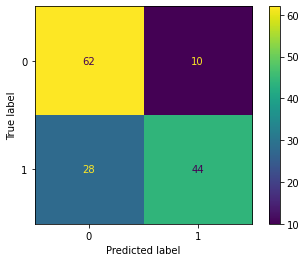

In [233]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [234]:
print("Precision ", precision(cm_radial_svm))

Precision  0.8148148148148148


In [235]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.6111111111111112


In [236]:
print("F1:", f1(cm_radial_svm))

F1: 0.6984126984126984


In [237]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

44

In [238]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

62

In [239]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

10

In [240]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

28

In [241]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.4877090139668599


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [258]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40,
                                          45, 50],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 25, 'n_estimators': 100}
Best cross-validation score (accuracy): 0.6228815824645817
OOB score of best model: 0.6388888888888888


### Compute the classification metrics on the cross-validation results 

In [259]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.6228815824645817
Standard Deviation of Accuracy: 0.05368535124302563
Mean Cross-Validation Precision - 1: 0.6894966261808367
Standard Deviation of Precision - 1: 0.053915401240042286
Mean Cross-Validation Recall - 1: 0.4353065539112051
Standard Deviation of Recall - 1: 0.13302180424970994
Mean Cross-Validation F1-score - 1: 0.5247996528883547
Standard Deviation of F1-score - 1: 0.11274373145193801


In [260]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.5948935415773329
Standard Deviation of Precision - 0: 0.051518468691869906
Mean Cross-Validation Recall - 0: 0.8099365750528541
Standard Deviation of Recall - 0: 0.0481287214380793
Mean Cross-Validation F1-score: - 0 0.6834448643144295
Standard Deviation of F1-score: - 0 0.030078770985485274


In [261]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=25, n_estimators=100, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [262]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.62      0.88      0.72        72
           1       0.79      0.46      0.58        72

    accuracy                           0.67       144
   macro avg       0.70      0.67      0.65       144
weighted avg       0.70      0.67      0.65       144



### Study the Random Forest function

In [263]:
clf_rf = RandomForestClassifier(max_features=25, n_estimators=100, random_state=123)

In [264]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=25, random_state=123)

In [265]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [266]:
y_pred_rf

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [267]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.6666666666666666


In [268]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[63  9]
 [39 33]]


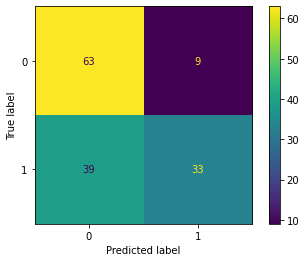

In [269]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [270]:
print("Precision ", precision(cm_rf))

Precision  0.7857142857142857


In [271]:
print("Recall:", recall(cm_rf))

Recall: 0.4583333333333333


In [272]:
print("F1:", f1(cm_rf))

F1: 0.5789473684210527


In [273]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

33

In [274]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

63

In [275]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

9

In [276]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

39

In [277]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.3666793988112845


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [278]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.1
Best Max Depth: 9
Best Number of Trees: 100
Best Accuracy: 0.7291633253140871


### Compute the classification metrics on the cross-validation results 

In [279]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.7291633253140871
Standard Deviation of Accuracy: 0.033142401760164086
Mean Cross-Validation Precision - 1: 0.7388171225937183
Standard Deviation of Precision - 1: 0.04889659359615723
Mean Cross-Validation Recall - 1: 0.7217758985200846
Standard Deviation of Recall - 1: 0.10681534423853067
Mean Cross-Validation F1-score - 1: 0.7231802927649619
Standard Deviation of F1-score - 1: 0.05263631992957509


In [280]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.734129399537748
Standard Deviation of Precision - 0: 0.055977755145838914
Mean Cross-Validation Recall - 0: 0.7362579281183932
Standard Deviation of Recall - 0: 0.07805392608660143
Mean Cross-Validation F1-score: - 0 0.7305315215300953
Standard Deviation of F1-score: - 0 0.029908865581538147


In [281]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=9, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [282]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        72
           1       0.82      0.69      0.75        72

    accuracy                           0.77       144
   macro avg       0.78      0.77      0.77       144
weighted avg       0.78      0.77      0.77       144



### Study the eXtreme Gradient Boosting function

In [283]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=9, random_state=123) 

In [284]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [285]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [286]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.7708333333333334


In [287]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[61 11]
 [22 50]]


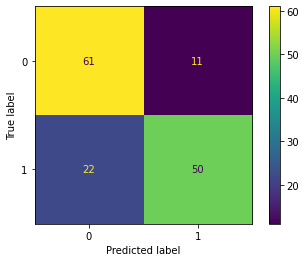

In [288]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [289]:
print("Precision ", precision(cm_xgb))

Precision  0.819672131147541


In [290]:
print("Recall:", recall(cm_xgb))

Recall: 0.6944444444444444


In [291]:
print("F1:", f1(cm_xgb))

F1: 0.7518796992481204


In [292]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

50

In [293]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

61

In [294]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

11

In [295]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

22

In [296]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.5481010617117033
